In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'svg'

In [4]:
# Reading all data into pandas dataframes
df_2018 = pd.read_csv('./datasets/hotel_revenue_2018.csv')
df_2019 = pd.read_csv('./datasets/hotel_revenue_2019.csv')
df_2020 = pd.read_csv('./datasets/hotel_revenue_2020.csv')
df_ms = pd.read_csv('./datasets/market_segment.csv')
df_mc = pd.read_csv('./datasets/meal_cost.csv')

#### 2018 General Data Insights

In [5]:
df_2018.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06-05-18
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22-04-18
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,23-06-18
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,11-05-18
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,29-05-18


In [6]:
df_2018.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,21996.000000,21996.000000,21996.0,21996.000000,21996.000000,21996.000000,21996.000000,21996.000000,21992.000000,21996.000000,21996.000000,21996.000000,21996.000000,21996.000000,18897.000000,1305.000000,21996.000000,21996.000000,21996.000000,21996.000000
mean,0.370158,97.245999,2018.0,39.618976,15.630342,0.929714,2.461266,1.830424,0.061704,0.010138,0.029142,0.336425,0.031915,0.177669,78.455416,151.665900,2.279778,87.178515,0.061466,0.435443
std,0.482858,105.104227,0.0,6.810472,8.712245,1.005584,1.892400,0.851232,0.319672,0.116152,0.168207,1.823073,0.374912,0.545776,102.368913,108.821667,13.078451,42.748795,0.240944,0.743031
min,0.000000,0.000000,2018.0,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,2018.0,34.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,40.000000,0.000000,62.000000,0.000000,0.000000
50%,0.000000,56.000000,2018.0,39.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,122.000000,0.000000,77.760000,0.000000,0.000000
75%,1.000000,146.000000,2018.0,44.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,175.000000,223.000000,0.000000,108.000000,0.000000,1.000000
max,1.000000,737.000000,2018.0,53.000000,31.000000,18.000000,42.000000,55.000000,10.000000,9.000000,1.000000,26.000000,14.000000,20.000000,352.000000,356.000000,122.000000,508.000000,2.000000,5.000000


In [7]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21996 entries, 0 to 21995
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           21996 non-null  object 
 1   is_canceled                     21996 non-null  int64  
 2   lead_time                       21996 non-null  int64  
 3   arrival_date_year               21996 non-null  int64  
 4   arrival_date_month              21996 non-null  object 
 5   arrival_date_week_number        21996 non-null  int64  
 6   arrival_date_day_of_month       21996 non-null  int64  
 7   stays_in_weekend_nights         21996 non-null  int64  
 8   stays_in_week_nights            21996 non-null  int64  
 9   adults                          21996 non-null  int64  
 10  children                        21992 non-null  float64
 11  babies                          21996 non-null  int64  
 12  meal                            

##### 2019 Revenue General Data Insights

In [8]:
df_2019.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,20,2019,January,1,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,119.0,0,0,Canceled,22-12-18
1,Resort Hotel,1,76,2019,January,1,1,1,2,2,...,No Deposit,240.0,NaN,0,Transient,57.9,0,1,Canceled,20-12-18
2,Resort Hotel,1,113,2019,January,1,2,0,1,2,...,Non Refund,305.0,NaN,0,Transient,72.0,0,0,Canceled,16-11-18
3,Resort Hotel,1,113,2019,January,1,2,0,1,2,...,Non Refund,305.0,NaN,0,Transient,72.0,0,0,Canceled,16-11-18
4,Resort Hotel,1,113,2019,January,1,2,0,1,2,...,Non Refund,305.0,NaN,0,Transient,72.0,0,0,Canceled,16-11-18


In [9]:
df_2019.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,79264.000000,79264.000000,79264.0,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,79260.000000,79264.000000,79264.000000,79264.000000,79264.000000,79264.000000,68472.000000,4510.000000,79264.000000,79264.000000,79264.000000,79264.000000
mean,0.365260,101.063459,2019.0,31.485378,15.813093,0.903474,2.450583,1.845630,0.092480,0.008705,0.030531,0.125139,0.118818,0.210915,81.968162,163.452106,3.375467,95.000002,0.065982,0.516275
std,0.481506,105.946772,0.0,13.429799,8.738979,0.991648,1.879098,0.616085,0.378888,0.104525,0.172044,1.025689,1.333111,0.634315,105.126057,113.715879,21.278640,48.273647,0.249165,0.757528
min,0.000000,0.000000,2019.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,2019.0,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,46.000000,0.000000,65.000000,0.000000,0.000000
50%,0.000000,65.000000,2019.0,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,154.000000,0.000000,89.000000,0.000000,0.000000
75%,1.000000,157.000000,2019.0,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,191.000000,223.000000,0.000000,117.000000,0.000000,1.000000
max,1.000000,737.000000,2019.0,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,58.000000,21.000000,481.000000,499.000000,391.000000,5400.000000,3.000000,5.000000


In [10]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79264 entries, 0 to 79263
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79264 non-null  object 
 1   is_canceled                     79264 non-null  int64  
 2   lead_time                       79264 non-null  int64  
 3   arrival_date_year               79264 non-null  int64  
 4   arrival_date_month              79264 non-null  object 
 5   arrival_date_week_number        79264 non-null  int64  
 6   arrival_date_day_of_month       79264 non-null  int64  
 7   stays_in_weekend_nights         79264 non-null  int64  
 8   stays_in_week_nights            79264 non-null  int64  
 9   adults                          79264 non-null  int64  
 10  children                        79260 non-null  float64
 11  babies                          79264 non-null  int64  
 12  meal                            

##### 2020 Revenue General Data Insights

In [11]:
df_2020.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,74,2020,January,1,1,1,0,2,...,No Deposit,5.0,NaN,0,Transient,57.60,0,0,Canceled,20-10-19
1,Resort Hotel,1,62,2020,January,1,1,2,2,2,...,No Deposit,240.0,NaN,0,Transient,51.50,0,1,Canceled,04-12-19
2,Resort Hotel,1,62,2020,January,1,1,2,2,2,...,No Deposit,240.0,NaN,0,Transient,51.50,0,1,Canceled,11-11-19
3,Resort Hotel,1,62,2020,January,1,1,2,2,2,...,No Deposit,240.0,NaN,0,Transient,51.50,0,1,Canceled,04-12-19
4,Resort Hotel,1,71,2020,January,1,1,2,2,1,...,No Deposit,241.0,NaN,0,Transient,32.22,0,1,Canceled,29-10-19


In [12]:
df_2020.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,40687.000000,40687.000000,40687.0,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,40687.000000,35023.000000,2310.000000,40687.000000,40687.000000,40687.000000,40687.000000
mean,0.386979,109.259223,2020.0,18.630373,15.688180,0.973308,2.601543,1.877995,0.126281,0.006464,0.034188,0.011871,0.171062,0.239438,96.855409,239.696970,0.235186,114.637950,0.054981,0.676506
std,0.487065,107.940953,0.0,9.422475,8.746706,1.014337,1.973291,0.496172,0.436139,0.081659,0.181714,0.184520,1.765330,0.683429,120.664646,148.398028,4.458834,52.256304,0.235894,0.846531
min,0.000000,0.000000,2020.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,23.000000,2020.0,11.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,127.000000,0.000000,80.000000,0.000000,0.000000
50%,0.000000,80.000000,2020.0,19.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,223.000000,0.000000,107.100000,0.000000,0.000000
75%,1.000000,164.500000,2020.0,26.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,366.000000,0.000000,140.000000,0.000000,1.000000
max,1.000000,629.000000,2020.0,35.000000,31.000000,16.000000,40.000000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,535.000000,543.000000,223.000000,510.000000,8.000000,5.000000


In [13]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40687 entries, 0 to 40686
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           40687 non-null  object 
 1   is_canceled                     40687 non-null  int64  
 2   lead_time                       40687 non-null  int64  
 3   arrival_date_year               40687 non-null  int64  
 4   arrival_date_month              40687 non-null  object 
 5   arrival_date_week_number        40687 non-null  int64  
 6   arrival_date_day_of_month       40687 non-null  int64  
 7   stays_in_weekend_nights         40687 non-null  int64  
 8   stays_in_week_nights            40687 non-null  int64  
 9   adults                          40687 non-null  int64  
 10  children                        40687 non-null  int64  
 11  babies                          40687 non-null  int64  
 12  meal                            

In [14]:
df_2020.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

As far as can be observed from the collective datasets, the years 2018 and 2020 have only about 6 months of data, and as such certain insights that look across a full year cannot be reliably obtained

##### General Unified Data Examination

In [15]:
# Concatenate the separate yearly dataframes into one comprehensive dataframe and drop original index
df = pd.concat([df_2018, df_2019, df_2020], axis=0)
df = df.reset_index()
df.drop('index', inplace=True, axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06-05-18
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22-04-18
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,23-06-18
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,11-05-18
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,29-05-18


In [16]:
df.shape

(141947, 32)

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,141939.000000,141947.000000,141947.000000,141947.000000,141947.000000,141947.000000,122392.000000,8125.000000,141947.000000,141947.000000,141947.000000,141947.000000
mean,0.372245,102.821102,2019.131676,29.061058,15.748970,0.927557,2.495509,1.852551,0.097401,0.008285,0.031364,0.125413,0.120327,0.213939,85.685854,183.236062,2.305565,99.416916,0.062129,0.549677
std,0.483405,106.478569,0.651352,13.604758,8.737314,1.000817,1.909784,0.628553,0.388549,0.100520,0.174300,1.059631,1.381798,0.636479,109.628598,128.921950,16.938253,49.675549,0.244205,0.786541
min,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2019.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,51.000000,0.000000,65.750000,0.000000,0.000000
50%,0.000000,68.000000,2019.000000,30.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.000000,90.950000,0.000000,0.000000
75%,1.000000,158.000000,2020.000000,40.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,269.000000,0.000000,123.000000,0.000000,1.000000
max,1.000000,737.000000,2020.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141947 entries, 0 to 141946
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           141947 non-null  object 
 1   is_canceled                     141947 non-null  int64  
 2   lead_time                       141947 non-null  int64  
 3   arrival_date_year               141947 non-null  int64  
 4   arrival_date_month              141947 non-null  object 
 5   arrival_date_week_number        141947 non-null  int64  
 6   arrival_date_day_of_month       141947 non-null  int64  
 7   stays_in_weekend_nights         141947 non-null  int64  
 8   stays_in_week_nights            141947 non-null  int64  
 9   adults                          141947 non-null  int64  
 10  children                        141939 non-null  float64
 11  babies                          141947 non-null  int64  
 12  meal            

In [19]:
# Overview of the dataset columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [20]:
# Market Segment/Discount dataframe
df_ms

,Discount,market_segment
0,0.00,Undefined
1,0.10,Direct
2,0.10,Groups
3,0.15,Corporate
4,0.20,Aviation
5,0.30,Offline TA/TO
6,0.30,Online TA
7,1.00,Complementary


In [21]:
# Market Segment with largest discount value

# max_discount = df_ms['Discount'].max()
# max_discount_type = df_ms['market_segment'][df_ms['Discount'] == max_discount].values[0]
# print(max_discount_type, max_discount) ## Alt approach

df_ms.loc[df_ms['Discount'].idxmax()]

Discount                    1.0
market_segment    Complementary
Name: 7, dtype: object

In [22]:
# Adding "Discount" column to full dataframe to ease revenue calculations
discount = [df_ms[df_ms['market_segment'] == (df['market_segment']).values[i]]['Discount'].values[0] for i in df.index]
df.insert(16, 'Discount', discount)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06-05-18
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22-04-18
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,23-06-18
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,11-05-18
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,29-05-18


In [23]:
# Meal Package/Cost dataframe
df_mc

,Cost,meal
0,0.00,Undefined
1,12.99,BB
2,17.99,HB
3,21.99,FB
4,35.00,SC


In [24]:
# Most expensive meal package and price
df_mc.loc[df_mc['Cost'].idxmax()]

Cost    35.0
meal      SC
Name: 4, dtype: object

In [25]:
# Adding meal_cost column to full dataframe
meal_cost = [df_mc[df_mc['meal'] == (df['meal']).values[i]]['Cost'].values[0] for i in df.index]
df.insert(13, 'meal_cost', meal_cost)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06-05-18
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22-04-18
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,23-06-18
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,11-05-18
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,29-05-18


#### Market Segment Distribution

In [26]:
# Distribution of market segment
df.groupby('market_segment')['hotel'].count()

market_segment
Aviation           237
Complementary      913
Corporate         6486
Direct           14973
Groups           26115
Offline TA/TO    30379
Online TA        62840
Undefined            4
Name: hotel, dtype: int64

In [27]:
# Market segment distribution per hotel type
df.groupby(['hotel', 'market_segment'])['hotel'].count()

hotel         market_segment
City Hotel    Aviation            237
              Complementary       677
              Corporate          3552
              Direct             7076
              Groups            18925
              Offline TA/TO     20795
              Online TA         41837
              Undefined             4
Resort Hotel  Complementary       236
              Corporate          2934
              Direct             7897
              Groups             7190
              Offline TA/TO      9584
              Online TA         21003
Name: hotel, dtype: int64

In [28]:
# Creating market segment counts dataframe
df_msc = pd.DataFrame(df.groupby(['hotel', 'market_segment'])['hotel'].count())
df_msc = df_msc.rename(columns={0:'hotel', 'hotel':'market_segment_counts'}).reset_index()
df_msc

,hotel,market_segment,market_segment_counts
0,City Hotel,Aviation,237
1,City Hotel,Complementary,677
2,City Hotel,Corporate,3552
3,City Hotel,Direct,7076
4,City Hotel,Groups,18925
5,City Hotel,Offline TA/TO,20795
6,City Hotel,Online TA,41837
7,City Hotel,Undefined,4
8,Resort Hotel,Complementary,236
9,Resort Hotel,Corporate,2934


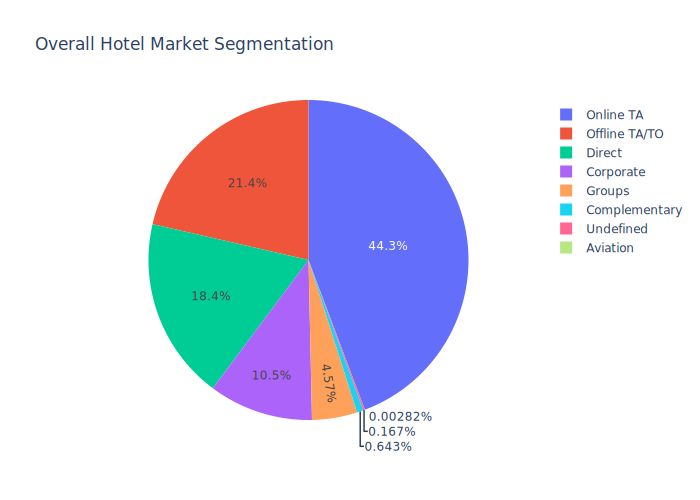

In [29]:
fig1 = px.pie(df, values=df['market_segment'].value_counts(), names=df['market_segment'].unique(), title="Overall Hotel Market Segmentation")
fig1

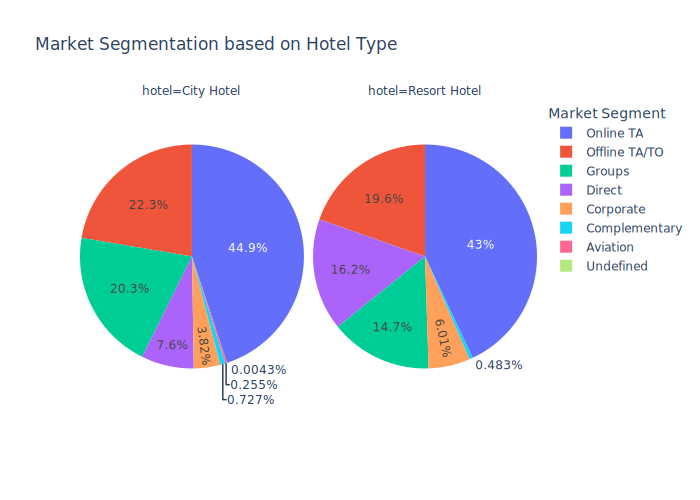

In [30]:
# Pie chart showing market segment distribution per hotel type
fig1_1 = px.pie(df_msc, values='market_segment_counts', names='market_segment', facet_col='hotel', title="Market Segmentation based on Hotel Type")
fig1_1.update_layout(legend=dict(title="Market Segment"))
fig1_1

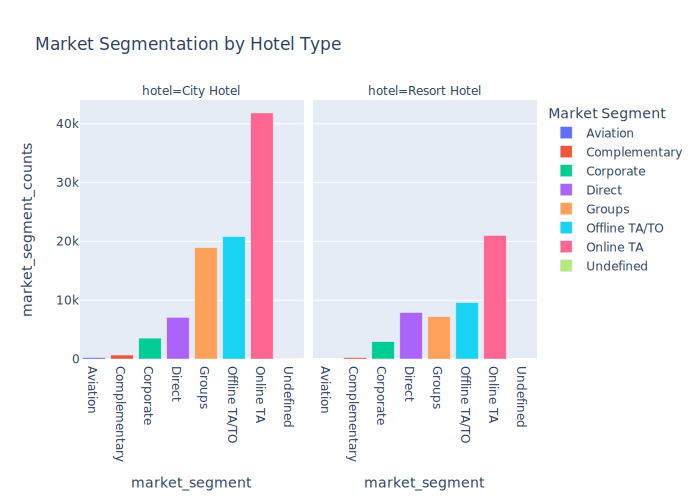

In [31]:
fig1_2 = px.bar(df_msc, x='market_segment', y='market_segment_counts', color='market_segment', facet_col='hotel', title="Market Segmentation by Hotel Type")
fig1_2.update_layout(legend=dict(title="Market Segment"))
fig1_2

#### Meal Package Distribution

In [32]:
# Distribution of meal packages
df.groupby('meal')['hotel'].count()

meal
BB           109878
FB             1228
HB            18402
SC            11067
Undefined      1372
Name: hotel, dtype: int64

In [33]:
# Meal package distribution per hotel
df.groupby(['hotel', 'meal'])['hotel'].count()

hotel         meal     
City Hotel    BB           73579
              FB              80
              HB            8479
              SC           10965
Resort Hotel  BB           36299
              FB            1148
              HB            9923
              SC             102
              Undefined     1372
Name: hotel, dtype: int64

In [34]:
# Create meal package counts (mpc) dataframe
df_mpc = pd.DataFrame(df.groupby(['hotel', 'meal'])['hotel'].count())
df_mpc = df_mpc.rename(columns={0:'hotel', 'hotel':'meal_counts'}).reset_index()
df_mpc

,hotel,meal,meal_counts
0,City Hotel,BB,73579
1,City Hotel,FB,80
2,City Hotel,HB,8479
3,City Hotel,SC,10965
4,Resort Hotel,BB,36299
5,Resort Hotel,FB,1148
6,Resort Hotel,HB,9923
7,Resort Hotel,SC,102
8,Resort Hotel,Undefined,1372


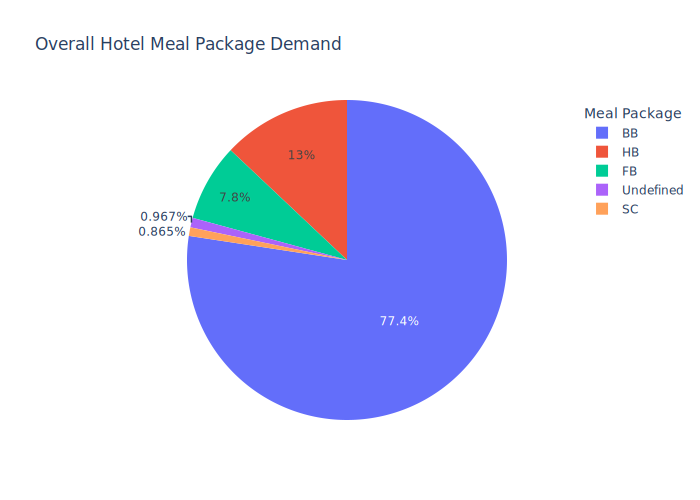

In [35]:
fig2 = px.pie(df, values=df['meal'].value_counts(), names=df['meal'].unique(), title="Overall Hotel Meal Package Demand").update_layout(legend=dict(title="Meal Package"))
fig2

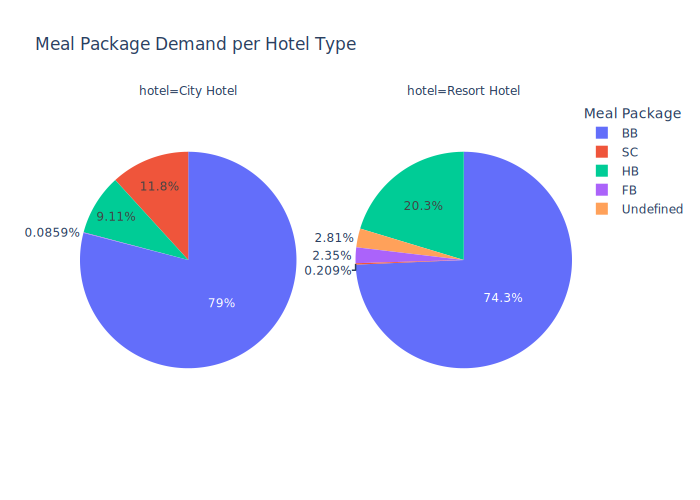

In [36]:
fig2_1 = px.pie(df_mpc, values='meal_counts', names='meal', facet_col='hotel', facet_col_spacing=0.12, title="Meal Package Demand per Hotel Type").update_layout(legend=dict(title="Meal Package"))
fig2_1

#### Meal Package Demand per Market Segment

In [37]:
df.groupby(['market_segment', 'meal'])['market_segment'].count()

market_segment  meal     
Aviation        BB             237
Complementary   BB             824
                FB              15
                HB              37
                SC              31
                Undefined        6
Corporate       BB            6287
                FB              27
                HB             118
                SC              39
                Undefined       15
Direct          BB           12898
                FB             108
                HB            1499
                SC             392
                Undefined       76
Groups          BB           20383
                FB             823
                HB            3906
                SC              42
                Undefined      961
Offline TA/TO   BB           21489
                FB             212
                HB            8030
                SC             350
                Undefined      298
Online TA       BB           47756
                FB           

In [38]:
# Creating the market segment - meal dataframe
df_msmp = pd.DataFrame(df.groupby(['market_segment', 'meal'])['market_segment'].count())
df_msmp = df_msmp.rename(columns={0:'market_segment', 'market_segment':'meal_counts'}).reset_index()
df_msmp

,market_segment,meal,meal_counts
0,Aviation,BB,237
1,Complementary,BB,824
2,Complementary,FB,15
3,Complementary,HB,37
4,Complementary,SC,31
5,Complementary,Undefined,6
6,Corporate,BB,6287
7,Corporate,FB,27
8,Corporate,HB,118
9,Corporate,SC,39


In [39]:
# df_msmp.loc[df_msmp['meal'] == "BB", 'meal'] = "BB (Bed & Breakfast)"
# df_msmp.loc[df_msmp['meal'] == "HB", 'meal'] = "HB (Half Board)"
# df_msmp.loc[df_msmp['meal'] == "FB", 'meal'] = "FB (Full Board)"
# df_msmp.loc[df_msmp['meal'] == "SC", 'meal'] = "SC (Self-catering)"

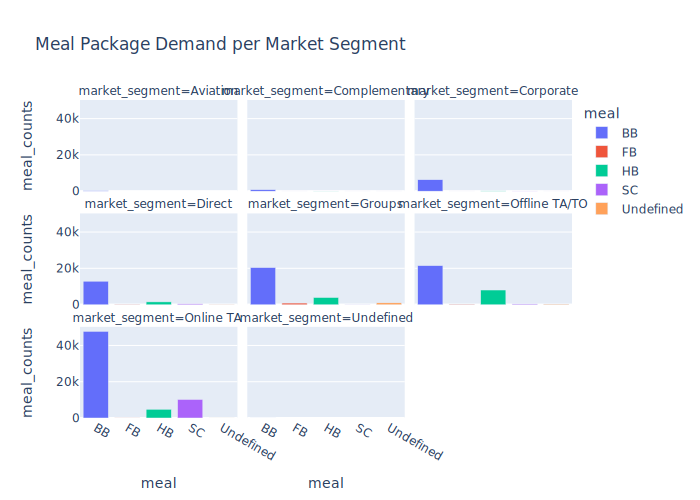

In [40]:
fig3_1 = px.bar(df_msmp, x='meal', y='meal_counts', color='meal', facet_col='market_segment', facet_col_wrap=3, title="Meal Package Demand per Market Segment")
fig3_1

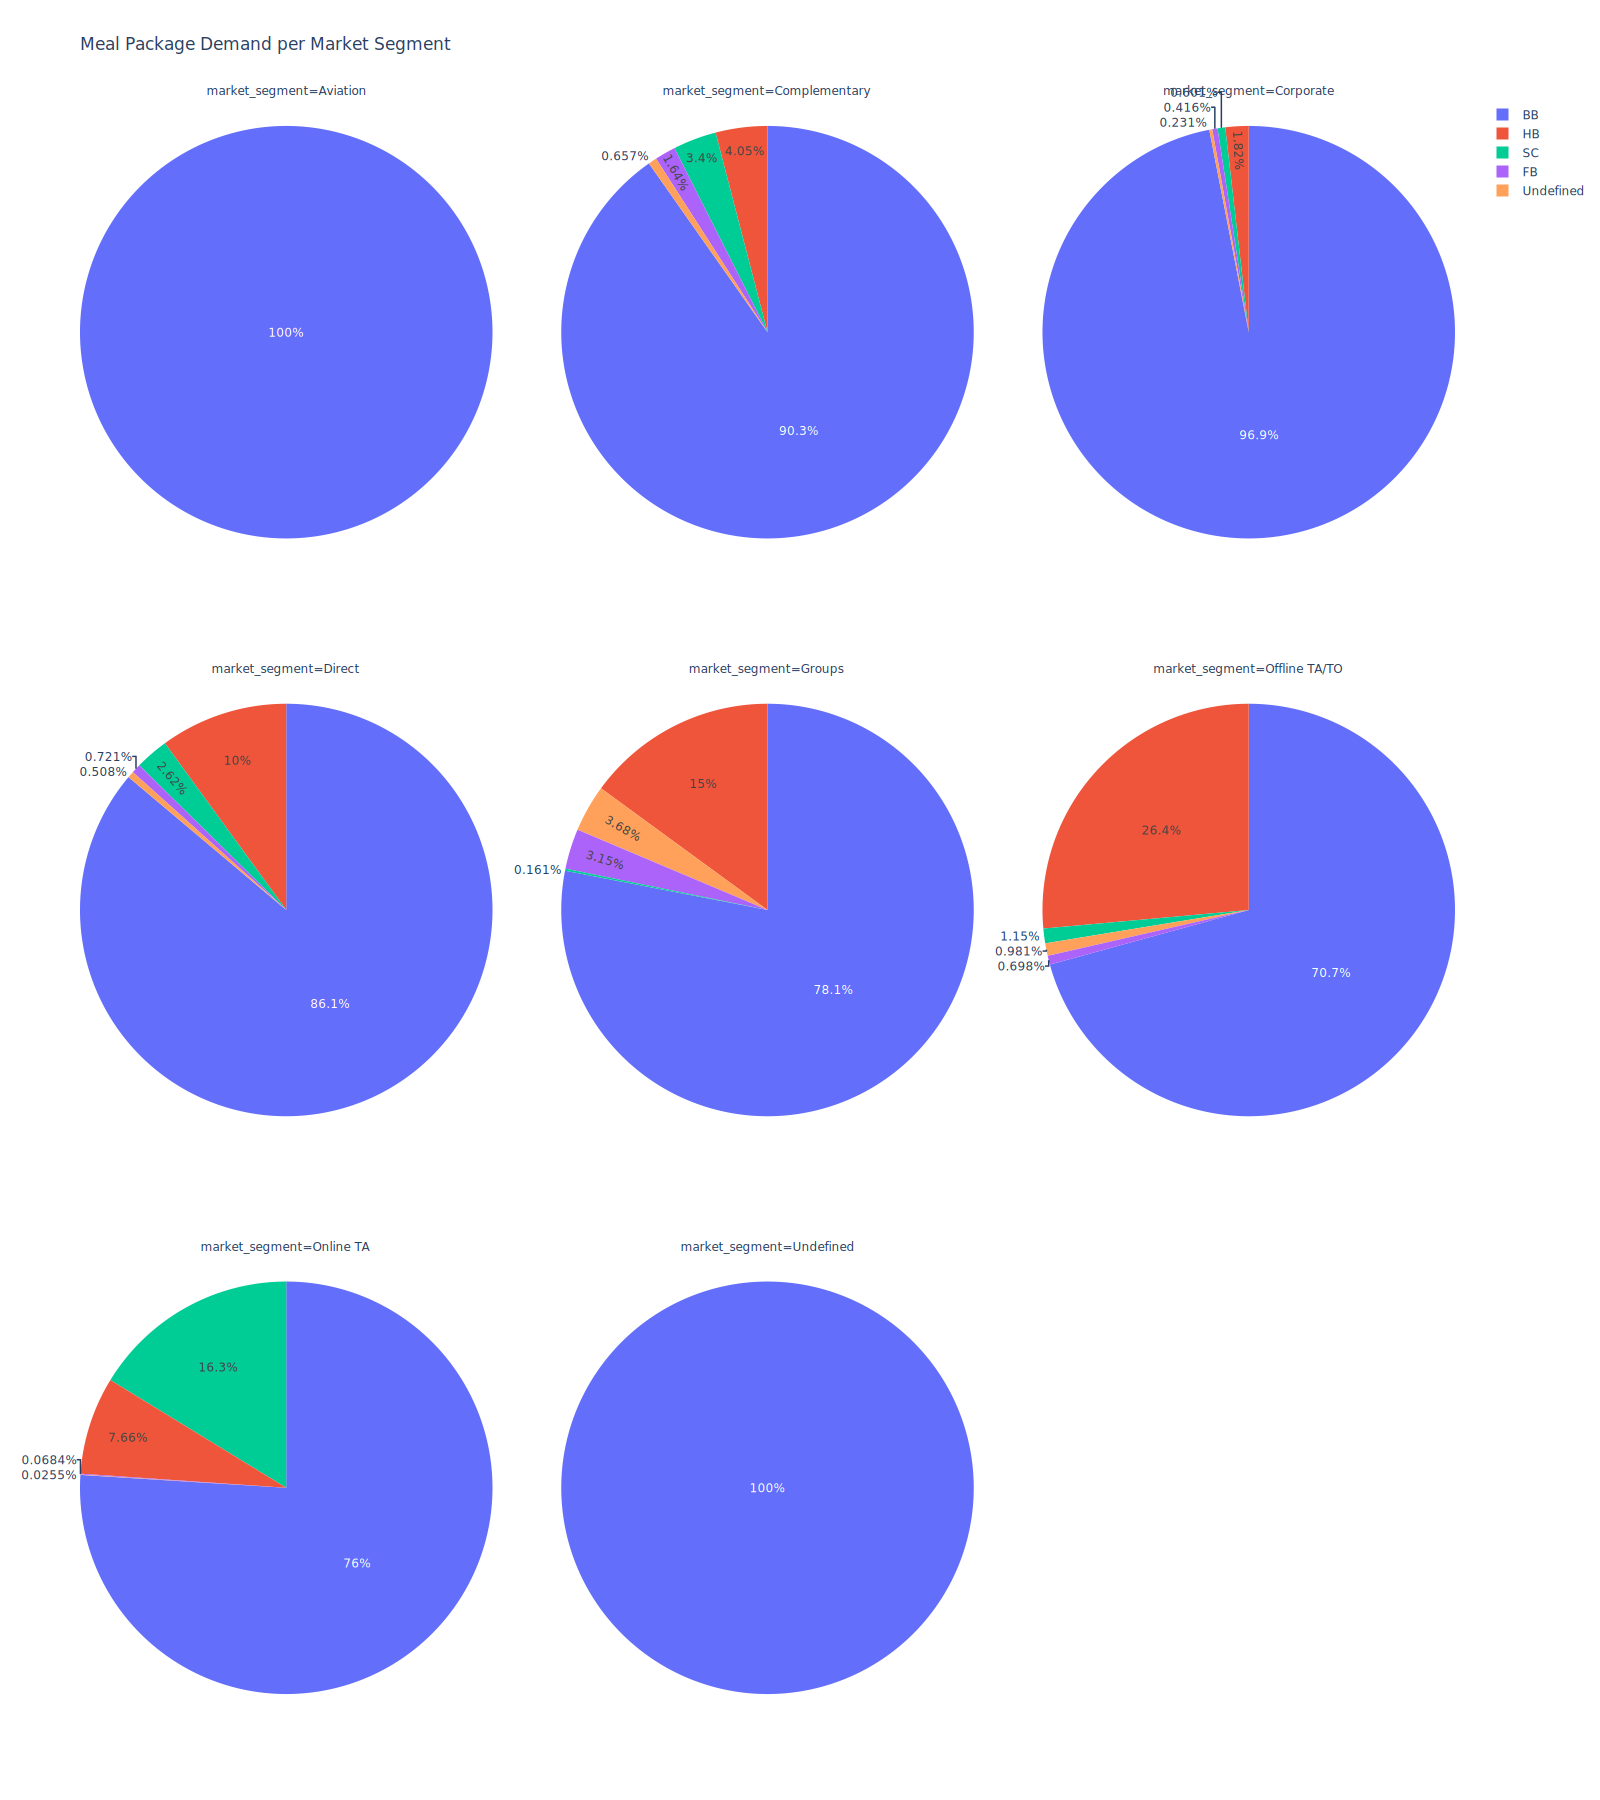

In [41]:
fig3_2 = px.pie(df_msmp, names='meal', values='meal_counts', facet_col='market_segment', facet_col_wrap=3, facet_col_spacing=0.05, height=1800, width=1600, title="Meal Package Demand per Market Segment")
fig3_2

#### Revenue Calculation

In [42]:
# Add revenue column to dataframe calculated from adr (average daily rate) and full week lodging while accounting for discount
full_lodging = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df['revenue'] = full_lodging * df['adr'] * (1-df['Discount'])
df['revenue']

0         172.20
1         221.55
2         344.40
3         524.30
4         974.70
           ...  
141942      0.00
141943    243.00
141944    318.75
141945     55.25
141946    110.50
Name: revenue, Length: 141947, dtype: float64

In [43]:
# Adding date column combining 

### Dataframe Export

In [45]:
# Export the concatenated and edited dataframe
df.to_csv('./exported/hotel_revenue_historical.csv')

In [46]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'meal_cost', 'country', 'market_segment', 'distribution_channel',
       'Discount', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'revenue'],
      dtype='object')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=468fa03a-c450-438e-989d-6d6662661c0f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>